# Capstone projects - Q2

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

    The selected types are the General, plumbing and paint/plaster

In [1]:
#Import pandas, numpy and pyplot for data wrangling, editting and viewing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Loading data
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_dd7eba6d38744f2ba0e41e1f24c776e4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='***',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')
body5 = client_dd7eba6d38744f2ba0e41e1f24c776e4.get_object(Bucket='capstoneproject-donotdelete-pr-w1e8lgzafyovbk',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body5, "__iter__"): body5.__iter__ = types.MethodType( __iter__, body5 )
    
df = pd.read_csv(body5)

In [2]:
#Selecting only open status complaints
df_open= df.loc[df['status'] == 'Open']

In [3]:
#Selecting the complaints that where found interesting in Q1
df_general = df_open.loc[(df_open['complaint_type'] == 'GENERAL CONSTRUCTION') | ( df_open['complaint_type']=='PAINT - PLASTER') | ( df_open['complaint_type']=='PLUMBING')]
df_general.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
23,2020-02-04T08:25:16.000,45546895,PLUMBING,11226.0,700 OCEAN AVENUE,OCEAN AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.646011,-73.960246,NaN,RESIDENTIAL BUILDING,Open
33,2020-02-04T16:30:03.000,45547914,PLUMBING,10031.0,3580 BROADWAY,BROADWAY,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.827816,-73.949427,NaN,RESIDENTIAL BUILDING,Open
44,2020-02-04T14:11:14.000,45545914,PLUMBING,10029.0,451 EAST 116 STREET,EAST 116 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.795250,-73.933601,NaN,RESIDENTIAL BUILDING,Open
45,2020-02-04T18:21:36.000,45547929,PLUMBING,10470.0,4300 MARTHA AVENUE,MARTHA AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.898894,-73.865022,NaN,RESIDENTIAL BUILDING,Open
60,2020-02-04T10:59:39.000,45545906,PLUMBING,10033.0,608 WEST 184 STREET,WEST 184 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.851245,-73.932807,NaN,RESIDENTIAL BUILDING,Open


What are the most commmon Borough, Incident_zip and street_name?

In [4]:
#Counting how many times each Borough appears in the DataFrame
df_general['borough'].value_counts()

BROOKLYN         19501
BRONX            17792
Unspecified      14100
MANHATTAN        11165
QUEENS            7571
STATEN ISLAND     1047
Name: borough, dtype: int64

In [5]:
#Counting how many times each Incident_zip appears in the data
df_general['incident_zip'].value_counts().head(10)

11226.0    3003
10458.0    2196
10453.0    1987
10467.0    1985
10032.0    1810
10468.0    1715
10031.0    1679
10452.0    1659
10040.0    1656
10457.0    1628
Name: incident_zip, dtype: int64

In [6]:
#Counting how many times each Street name appear in the data
df_general['street_name'].value_counts().head(10)

GRAND CONCOURSE       1164
BROADWAY               884
KINGS HIGHWAY          797
OCEAN AVENUE           760
NEW YORK AVENUE        668
ST NICHOLAS AVENUE     644
RIVERSIDE DRIVE        598
AMSTERDAM AVENUE       444
EASTERN PARKWAY        425
WALTON AVENUE          413
Name: street_name, dtype: int64

# Top-bottom analysis. From borough to street level. 
Brooklyn is the borough with more events registered followed -with not so much difference - by the BRONX. Is Brooklyn really different from the group?

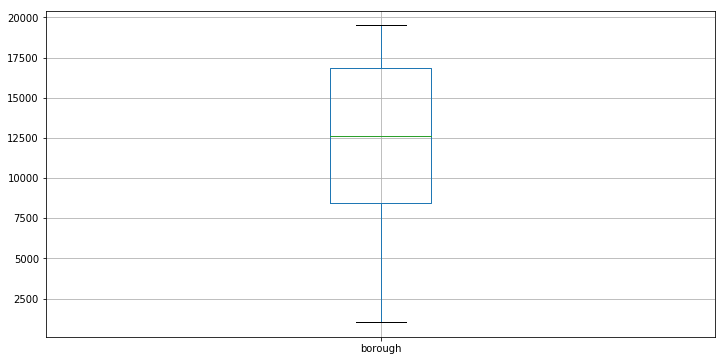

In [7]:
#Box plot of borough in the df_general
df_general['borough'].value_counts().plot(kind='box',figsize=[12,6],grid=True)

We don't have a specific borough that appears to be a outlier within the group.

Let's analyze instead the distribution for the ZIP codes.

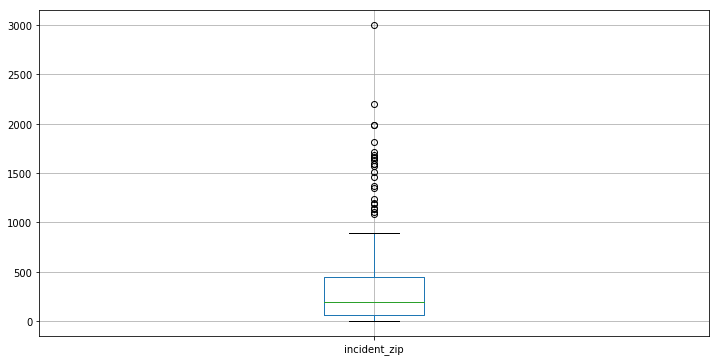

In [8]:
#Counting the appeareance of each incident_zip
df_zipFreq = df_general['incident_zip'].value_counts()
#let's see how is the group statistical distribution and maybe we can find outliers that could guide us for a solution.
df_zipFreq.plot(kind='box',figsize=[12,6],grid=True)

All the values higher than the third quartile are considered outliers, this are all above 1000 cases per ZIP code.
Which are this outliers?

In [9]:
#Selecting the Zip code with an appearence higher than 1000
df_zipOutFreq = df_zipFreq.loc[df_zipFreq > 1000]
len(df_zipOutFreq)

24

How important are this outliers as a subgroup? Which % of the complaints do they represent?

In [10]:
# Calculation of % of total complaints for the Outliers 
sum(df_zipOutFreq)/sum(df_zipFreq)*100

53.30058551964869

More than 50% of the complaints! That's a lot

Let's see this in a different perspective. We can calculate the incremental graph of complaints of the zip codes. Since we have them already ordered by frenquency of appeareance, we expect to have a curve very steep at the beginning. 

In [11]:
f_zipIncrement = []
for i in np.arange(0,len(df_zipFreq)):    #To calculate the increment it is needed to go through the f_zip
        if i == 0:
            f_zipIncrement.append(f_zip.iloc[i]) #values for the initial point
        else:                       
            f_zipIncrement.append(f_zip.iloc[i]+f_zipIncrement[i-1])

NameError: name 'f_zip' is not defined

In [ ]:
#plotting the frequency increment
fig = plt.plot(np.arange(0,len(f_zip)),f_zipIncrement)
#Marking the outlier group threshold
plt.axvline(x=24,color='red')
plt.title('Increment of complaints through the 175 Zip_Codes')
plt.xlabel('Zip codes')
plt.ylabel('Complaints')
plt.legend(['Incremental number of cmplaints','Zip codes outliers'])

We got somehow what we expected. 

Now, we will take a look deeper in the outliers subgroup. Let's approach it in different ways:
- Box plot of the subgroup. Any outlier?
- Which is the most common Borough?

In [ ]:
#Box plot of the subgroup
df_zipOutFreq.plot(kind='box')

In [ ]:
#Zip code of the outlier
df_zipOutFreq.index[0]

Seems that the Zip code 11226 is a outlier within the outlier group.

In [ ]:
#DF of the outlier zip code
df_11226 = df_general.loc[df_general['incident_zip'] == df_zipOutFreq.index[0]]

This belongs to the borough...

In [ ]:
#Borough of df_11226
df_11226['borough'].unique()

In [ ]:
#Which are the street of this zip code that had complaints? and how many?
df_11226['street_name'].value_counts()

Following the Top-bottom analysis we got that the 11226 Zip code has is one of the most incedential neighbourghoods in the dataset, however is this due to the size of this Zip code? We can see that there isn't any particular street with a very high number of incidences. Data such the territory size of a the zip code, the density of population and number of buildings should be required to decide if we are not being misleaded by the numbers.